# Module 5 - Probability

This notebook contains Python simulations and visualizations for the following probability concepts:
1. Basics of Probability
2. Conditional Probability and Bayes' Theorem
3. Random Variables and Discrete Probability
4. Continuous Random Variables
5. Central Limit Theorem

## 1. Basics of Probability

### a. Tossing a coin 10,000 times

In [1]:
import random

# Simulate 10,000 coin tosses
trials = 10000
heads = 0
tails = 0

for _ in range(trials):
    if random.choice(['H', 'T']) == 'H':
        heads += 1
    else:
        tails += 1

print(f"Heads: {heads} ({heads / trials:.4f})")
print(f"Tails: {tails} ({tails / trials:.4f})")

Heads: 4973 (0.4973)
Tails: 5027 (0.5027)


### b. Rolling two dice and computing the probability of sum = 7

In [2]:
sum_7 = 0

for _ in range(trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        sum_7 += 1

print(f"Sum=7 occurred: {sum_7} times")
print(f"Probability of sum=7: {sum_7 / trials:.4f}")

Sum=7 occurred: 1672 times
Probability of sum=7: 0.1672


## 2. At least One '6' in 10 Rolls

In [3]:
def estimate_prob_one_six(trials=10000):
    success = 0
    for _ in range(trials):
        if 6 in [random.randint(1, 6) for _ in range(10)]:
            success += 1
    return success / trials

prob = estimate_prob_one_six()
print(f"Estimated probability of at least one '6' in 10 rolls: {prob:.4f}")

Estimated probability of at least one '6' in 10 rolls: 0.8312


## 3. Conditional Probability and Bayes' Theorem

In [4]:
colors = ['R'] * 5 + ['G'] * 7 + ['B'] * 8
transitions = []
prev = random.choice(colors)

for _ in range(999):
    curr = random.choice(colors)
    transitions.append((prev, curr))
    prev = curr

# P(R | B)
count_B = 0
count_B_R = 0
for p, c in transitions:
    if p == 'B':
        count_B += 1
        if c == 'R':
            count_B_R += 1

p_r_given_b = count_B_R / count_B
print(f"P(Red | Previous Blue): {p_r_given_b:.4f}")

# Bayes' verification
from collections import Counter
curr_counts = Counter([c for _, c in transitions])
P_R = curr_counts['R'] / len(transitions)
P_B = curr_counts['B'] / len(transitions)

# P(B|R)
count_R = 0
count_R_B = 0
for p, c in transitions:
    if p == 'R':
        count_R += 1
        if c == 'B':
            count_R_B += 1

P_B_given_R = count_R_B / count_R
bayes_estimate = (P_B_given_R * P_R) / P_B
print(f"Bayes Estimate P(R|B): {bayes_estimate:.4f}")

P(Red | Previous Blue): 0.2682
Bayes Estimate P(R|B): 0.2846


## 4. Discrete Random Variable

In [3]:
import numpy as np

values = [1, 2, 3]
probs = [0.25, 0.35, 0.40]
sample = np.random.choice(values, size=1000, p=probs)

mean = np.mean(sample)
var = np.var(sample)
std = np.std(sample)

print(f"Mean: {mean:.4f}")
print(f"Variance: {var:.4f}")
print(f"Standard Deviation: {std:.4f}")

Mean: 2.1090
Variance: 0.6311
Standard Deviation: 0.7944


## 5. Continuous Random Variable (Exponential Distribution)

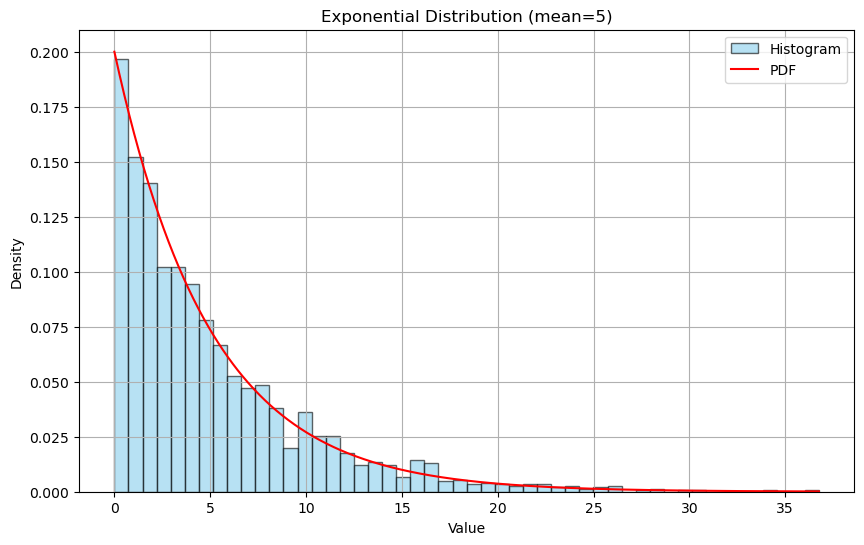

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import expon

exp_sample = np.random.exponential(scale=5, size=2000)

plt.figure(figsize=(10,6))
plt.hist(exp_sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')
x = np.linspace(0, np.max(exp_sample), 1000)
plt.plot(x, expon.pdf(x, scale=5), 'r-', label='PDF')
plt.title('Exponential Distribution (mean=5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## 6. Central Limit Theorem

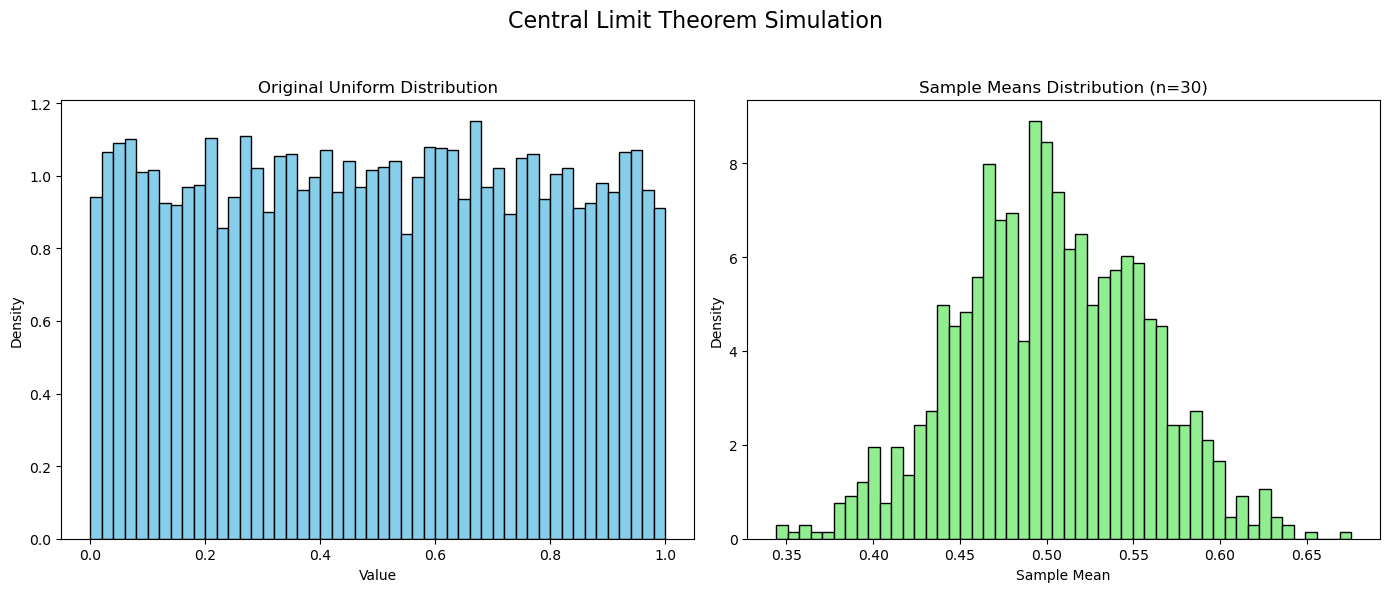

In [7]:
uniform_data = np.random.uniform(low=0, high=1, size=10000)
sample_means = [np.mean(np.random.choice(uniform_data, size=30, replace=False)) for _ in range(1000)]

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(uniform_data, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title('Original Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1,2,2)
plt.hist(sample_means, bins=50, density=True, color='lightgreen', edgecolor='black')
plt.title('Sample Means Distribution (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

plt.suptitle('Central Limit Theorem Simulation', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()